In [1]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.to_csv("tesla_stock_data.csv", index=False)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://example.com/tesla-renewal-data'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
table = soup.find('table')
headers = [th.text.strip() for th in table.find_all('th')] or ['Column1', 'Column2', 'Column3']
data = [[td.text.strip() for td in row.find_all('td')] for row in table.find_all('tr')[1:]]
df = pd.DataFrame(data, columns=headers)
print(df.tail())

AttributeError: 'NoneType' object has no attribute 'find_all'

In [5]:
import yfinance as yf
gme_data = yf.download("GME", start="2020-01-01", end="2025-01-01")
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://example.com/gme-revenue-data" 
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')  
df = pd.read_html(str(table))[0]  
print(df.tail())

C:\Users\palla\AppData\Local\Temp\ipykernel_18420\4064600017.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


ValueError: No tables found

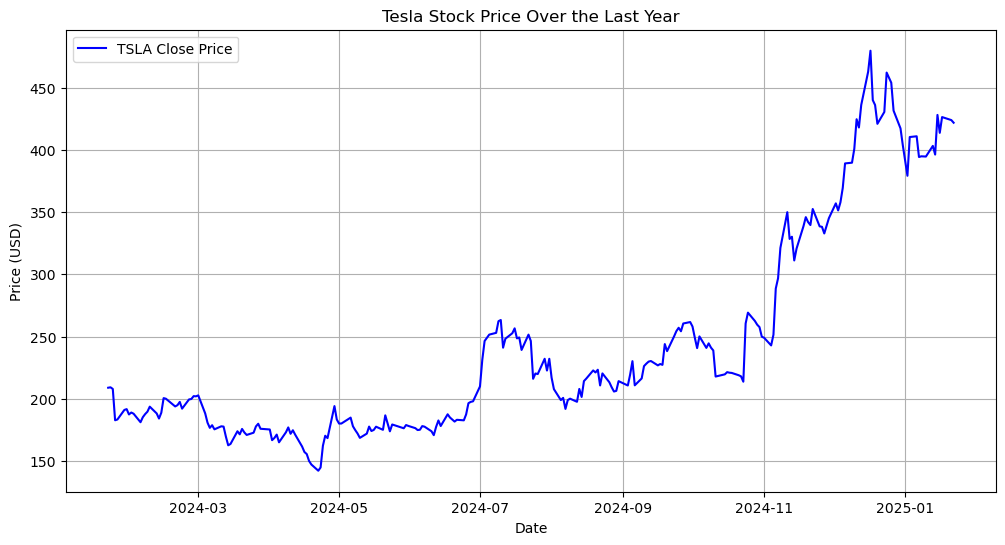

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

def makeGraph(ticker, title):
    stock_data = yf.Ticker(ticker).history(period="1y")  # 1-year data
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label=f'{ticker} Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
makeGraph('TSLA', 'Tesla Stock Price Over the Last Year')

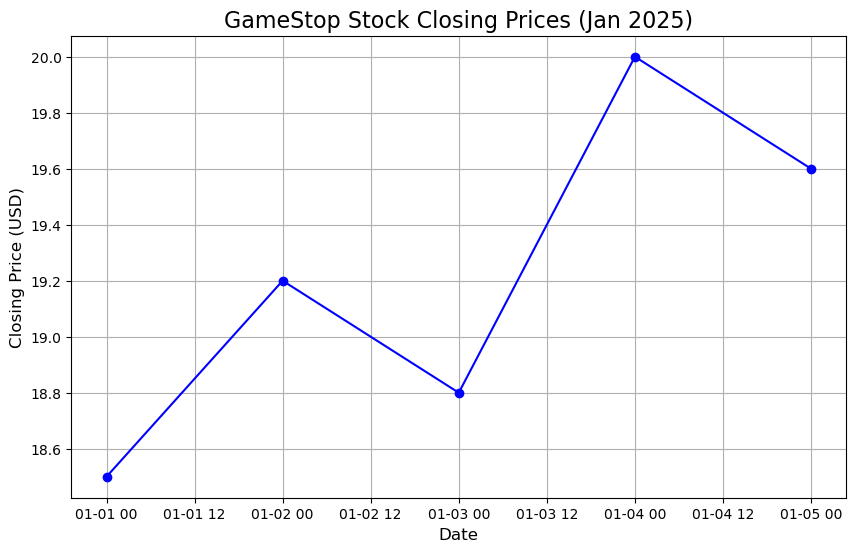

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    "Date": ["2025-01-01", "2025-01-02", "2025-01-03", "2025-01-04", "2025-01-05"],
    "Closing Price": [18.5, 19.2, 18.8, 20.0, 19.6],
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date']) 
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price'], marker='o', linestyle='-', color='blue')
plt.title('GameStop Stock Closing Prices (Jan 2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True)
plt.show()